In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [291]:
## Lets create synthetic data point
from sklearn.datasets import make_classification

In [292]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [293]:
X

array([[ 1.46746231,  1.01559282],
       [-1.34813119, -1.30659811],
       [-1.80168983, -1.52667819],
       ...,
       [ 1.16295684, -1.18781682],
       [-1.49227521, -2.14555662],
       [ 1.30324465,  0.94360735]])

In [294]:
y

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [295]:
pd.DataFrame(X)[0]

0      1.467462
1     -1.348131
2     -1.801690
3     -0.747977
4      2.373167
         ...   
995    2.030993
996   -0.046920
997    1.162957
998   -1.492275
999    1.303245
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

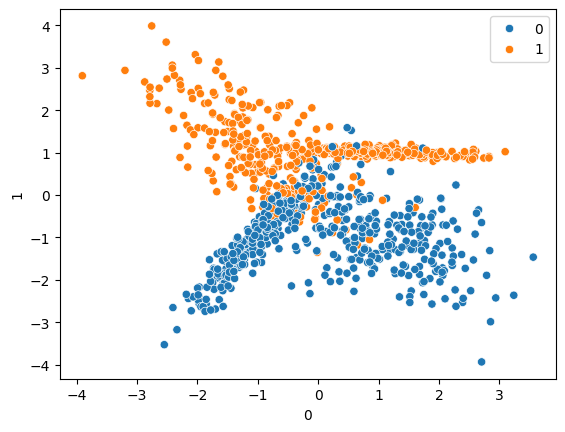

In [296]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [299]:
from sklearn.svm import SVC

In [300]:
svc = SVC(kernel="linear")

In [301]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [302]:
## Predictions
y_pred = svc.predict(X_test)

In [303]:
from sklearn.metrics import classification_report,confusion_matrix

In [304]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       122
           1       0.95      0.88      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[116   6]
 [ 16 112]]


In [305]:
rbf=SVC(kernel='rbf')

In [306]:
rbf.fit(X_train,y_train)

SVC()

In [307]:
y_pred1 = rbf.predict(X_test)

In [308]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       122
           1       0.98      0.87      0.92       128

    accuracy                           0.92       250
   macro avg       0.93      0.93      0.92       250
weighted avg       0.93      0.92      0.92       250

[[120   2]
 [ 17 111]]


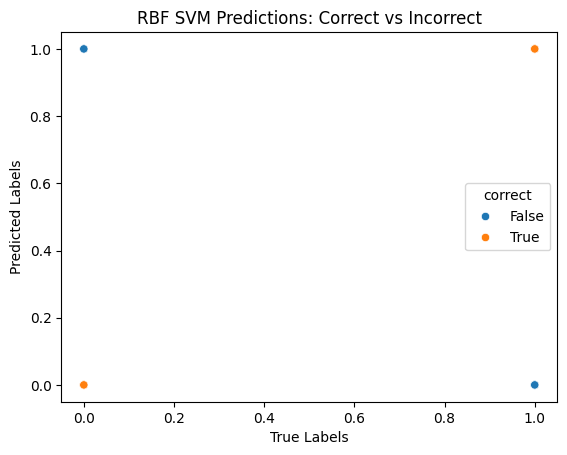

In [309]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred1,
    'correct': y_test == y_pred1
})
sns.scatterplot(data=df, x='y_test', y='y_pred', hue='correct')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('RBF SVM Predictions: Correct vs Incorrect')
plt.show()

In [310]:
poly=SVC(kernel='poly')

In [311]:
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [312]:
y_pred2 = poly.predict(X_test)

In [313]:
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       122
           1       0.98      0.84      0.91       128

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250

[[120   2]
 [ 20 108]]


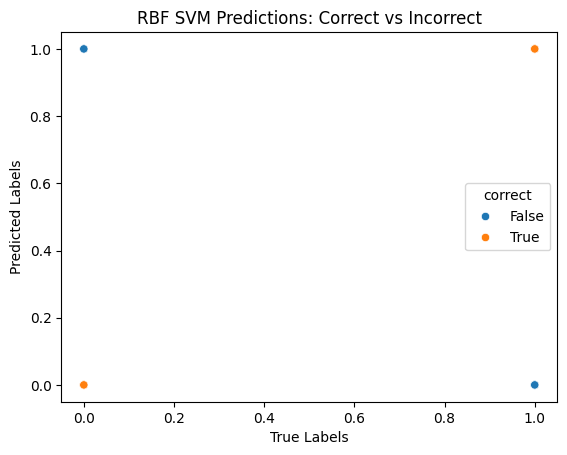

In [314]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred2,
    'correct': y_test == y_pred2
})
sns.scatterplot(data=df, x='y_test', y='y_pred', hue='correct')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('RBF SVM Predictions: Correct vs Incorrect')
plt.show()

In [315]:
sig =SVC(kernel='sigmoid')


In [316]:
sig.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [317]:
y_pred3 = sig.predict(X_test)

In [318]:
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[107  15]
 [ 29  99]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.87      0.77      0.82       128

    accuracy                           0.82       250
   macro avg       0.83      0.83      0.82       250
weighted avg       0.83      0.82      0.82       250



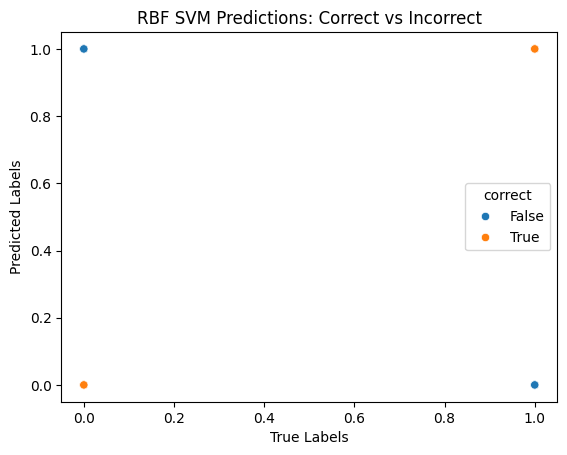

In [319]:
df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred3,
    'correct': y_test == y_pred3
})
sns.scatterplot(data=df, x='y_test', y='y_pred', hue='correct')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('RBF SVM Predictions: Correct vs Incorrect')
plt.show()

### Hyperparameter Tuning wiht SCV

In [320]:
from sklearn.model_selection import GridSearchCV

## Definging parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              "gamma":[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [321]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [322]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [323]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [324]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       122
           1       0.98      0.87      0.92       128

    accuracy                           0.92       250
   macro avg       0.93      0.93      0.92       250
weighted avg       0.93      0.92      0.92       250

[[120   2]
 [ 17 111]]
